**Проектная работа по модулю “Препроцессинг данных”**

1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
data = pd.read_csv('data_breast.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# посмотрим, какие в таблице типы данных, и есть ли пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# пропущенных значений нет, за исключением колонки "Unnamed: 32". В ней все значения N/A
# категориальная переменная одна - диагноз (diagnosis)

Описание переменных

Attribute Information:

1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

Описание переменных на русском языке

Информация об атрибутах:

1) идентификационный номер
2) Диагноз (М = злокачественный, В = доброкачественный)
3-32)

Десять действительных признаков вычисляются для каждого ядра клетки:

а) радиус (среднее расстояние от центра до точек по периметру)
б) текстура (стандартное отклонение значений серой шкалы)
в) периметр
г) площадь
д) гладкость (локальное изменение длины радиуса)
е) компактность (периметр ^ 2 / площадь - 1,0)
ж) вогнутость (выраженность вогнутых участков контура)
з) вогнутые точки (количество вогнутых участков контура)
и) симметрия
к) фрактальная размерность («приближение береговой линии» - 1)

In [5]:
#избавимся от колонки 'id', т.к. мы анализируем данные в общем виде и номер пациента нам будет только мешать

data.drop(['id'], axis = 1, inplace=True)

2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Из необходимых нам метрик в данной таблице есть почти все: минимум (min) и максимум (max) каждой переменной, среднее значение (mean), медиана (50%) и стандартное отклонение (std). Осталось найти моду.

In [7]:
#мода. транспонируем для удобства восприятия
data.mode()[ :1].T

,0
diagnosis,B
radius_mean,12.34
texture_mean,14.93
perimeter_mean,82.61
area_mean,512.2
smoothness_mean,0.1007
compactness_mean,0.1147
concavity_mean,0
concave points_mean,0
symmetry_mean,0.1601


3. Выбрать стратегию для работы с пропущенными значениями.

In [8]:
#избавимся от пропущенных значений
#удалим колонку Unnamed 32

data.drop(['Unnamed: 32'], axis = 1, inplace=True)

Из таблицы видно, что все характеристики клеток представлены по три раза: с 'mean' (среднее значение), 'se' (стандартная ошибка) и 'worst'(худшее значение)

Для анализа возьмем данные по средним значениям характеристик, т.е. столбцы с 'mean'

In [9]:
columns = data.columns.tolist() # создаем список колонок
columns

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [10]:
# найдем все переменные с 'mean' в названии
for column in columns:
    if 'mean' in column:
        print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean


In [11]:
#собираем в список все 'mean'-переменные
useful_cols = [column for column in columns if 'mean' in column]
#добавляем колонку 'диагноз'
useful_cols.insert(0,'diagnosis') 
#получаем список "полезных" колонок, с ним и будем дальше работать
useful_cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [12]:
#сформируем таблицу из "полезных" колонок
data_mean = data[useful_cols]
data_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [13]:
# категориальные переменные только в поле diagnosis                  
# присовим диагнозу 'M' значения единицы, диагнозу 'B' - нули
data_mean['diagnosis'] = [ 1 if each == "M" else 0 for each in data_mean['diagnosis']]
# проверим, как изменился тип данных и количество ненулевых значений в колонке 'diagnosis'
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
diagnosis                 569 non-null int64
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


C:\Users\Expert\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
corr = data_mean.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


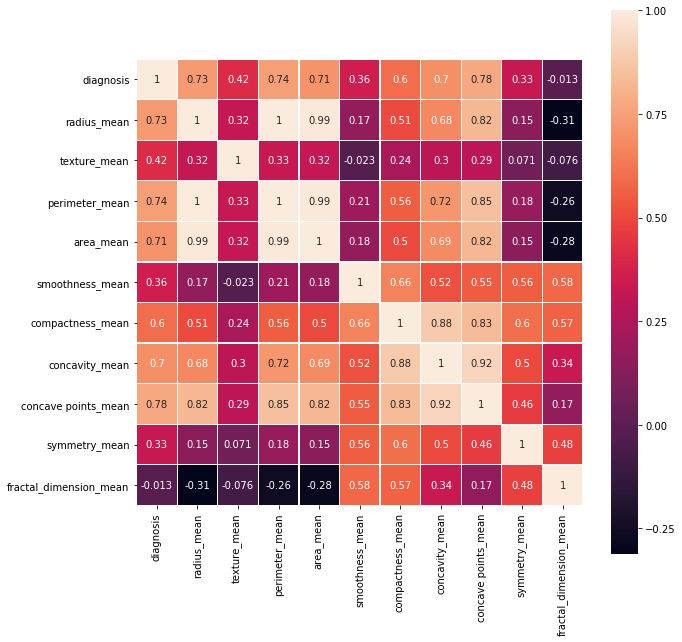

In [15]:
#увеличим размер графика
plt.figure(figsize=(10,10))

corr = data_mean.corr()
sns.heatmap(corr, annot=True, square=True, linewidths=0.2)

Посмотрим, какие признаки сильнее всего коррелируют друг с другом и с диагнозом.

Друг с другом:
1)'radius_mean' с 'area_mean' 0,99
2)'perimeter_mean' с 'area_mean' 0,99
3)'concavity_mean' с 'concave points_mean' 0,92
4)'compactness_mean' с 'concavity_mean' 0,88
5)'perimeter_mean' с 'concave points_mean' 0,85
6)'compactness_mean' с 'concave points_mean' 0,83
7)'area_mean' с 'concave points_mean' 0,82
8)'radius_mean' с 'concave points_mean' 0,82
9)'perimeter_mean' с 'concavity_mean' 0,72

С диагнозом:
1.'concave points_mean' 0,78
2.'perimeter_mean' 0,74
3.'radius_mean' 0,73
4.'area_mean' 0,71
5.'concavity_mean' 0,70


5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

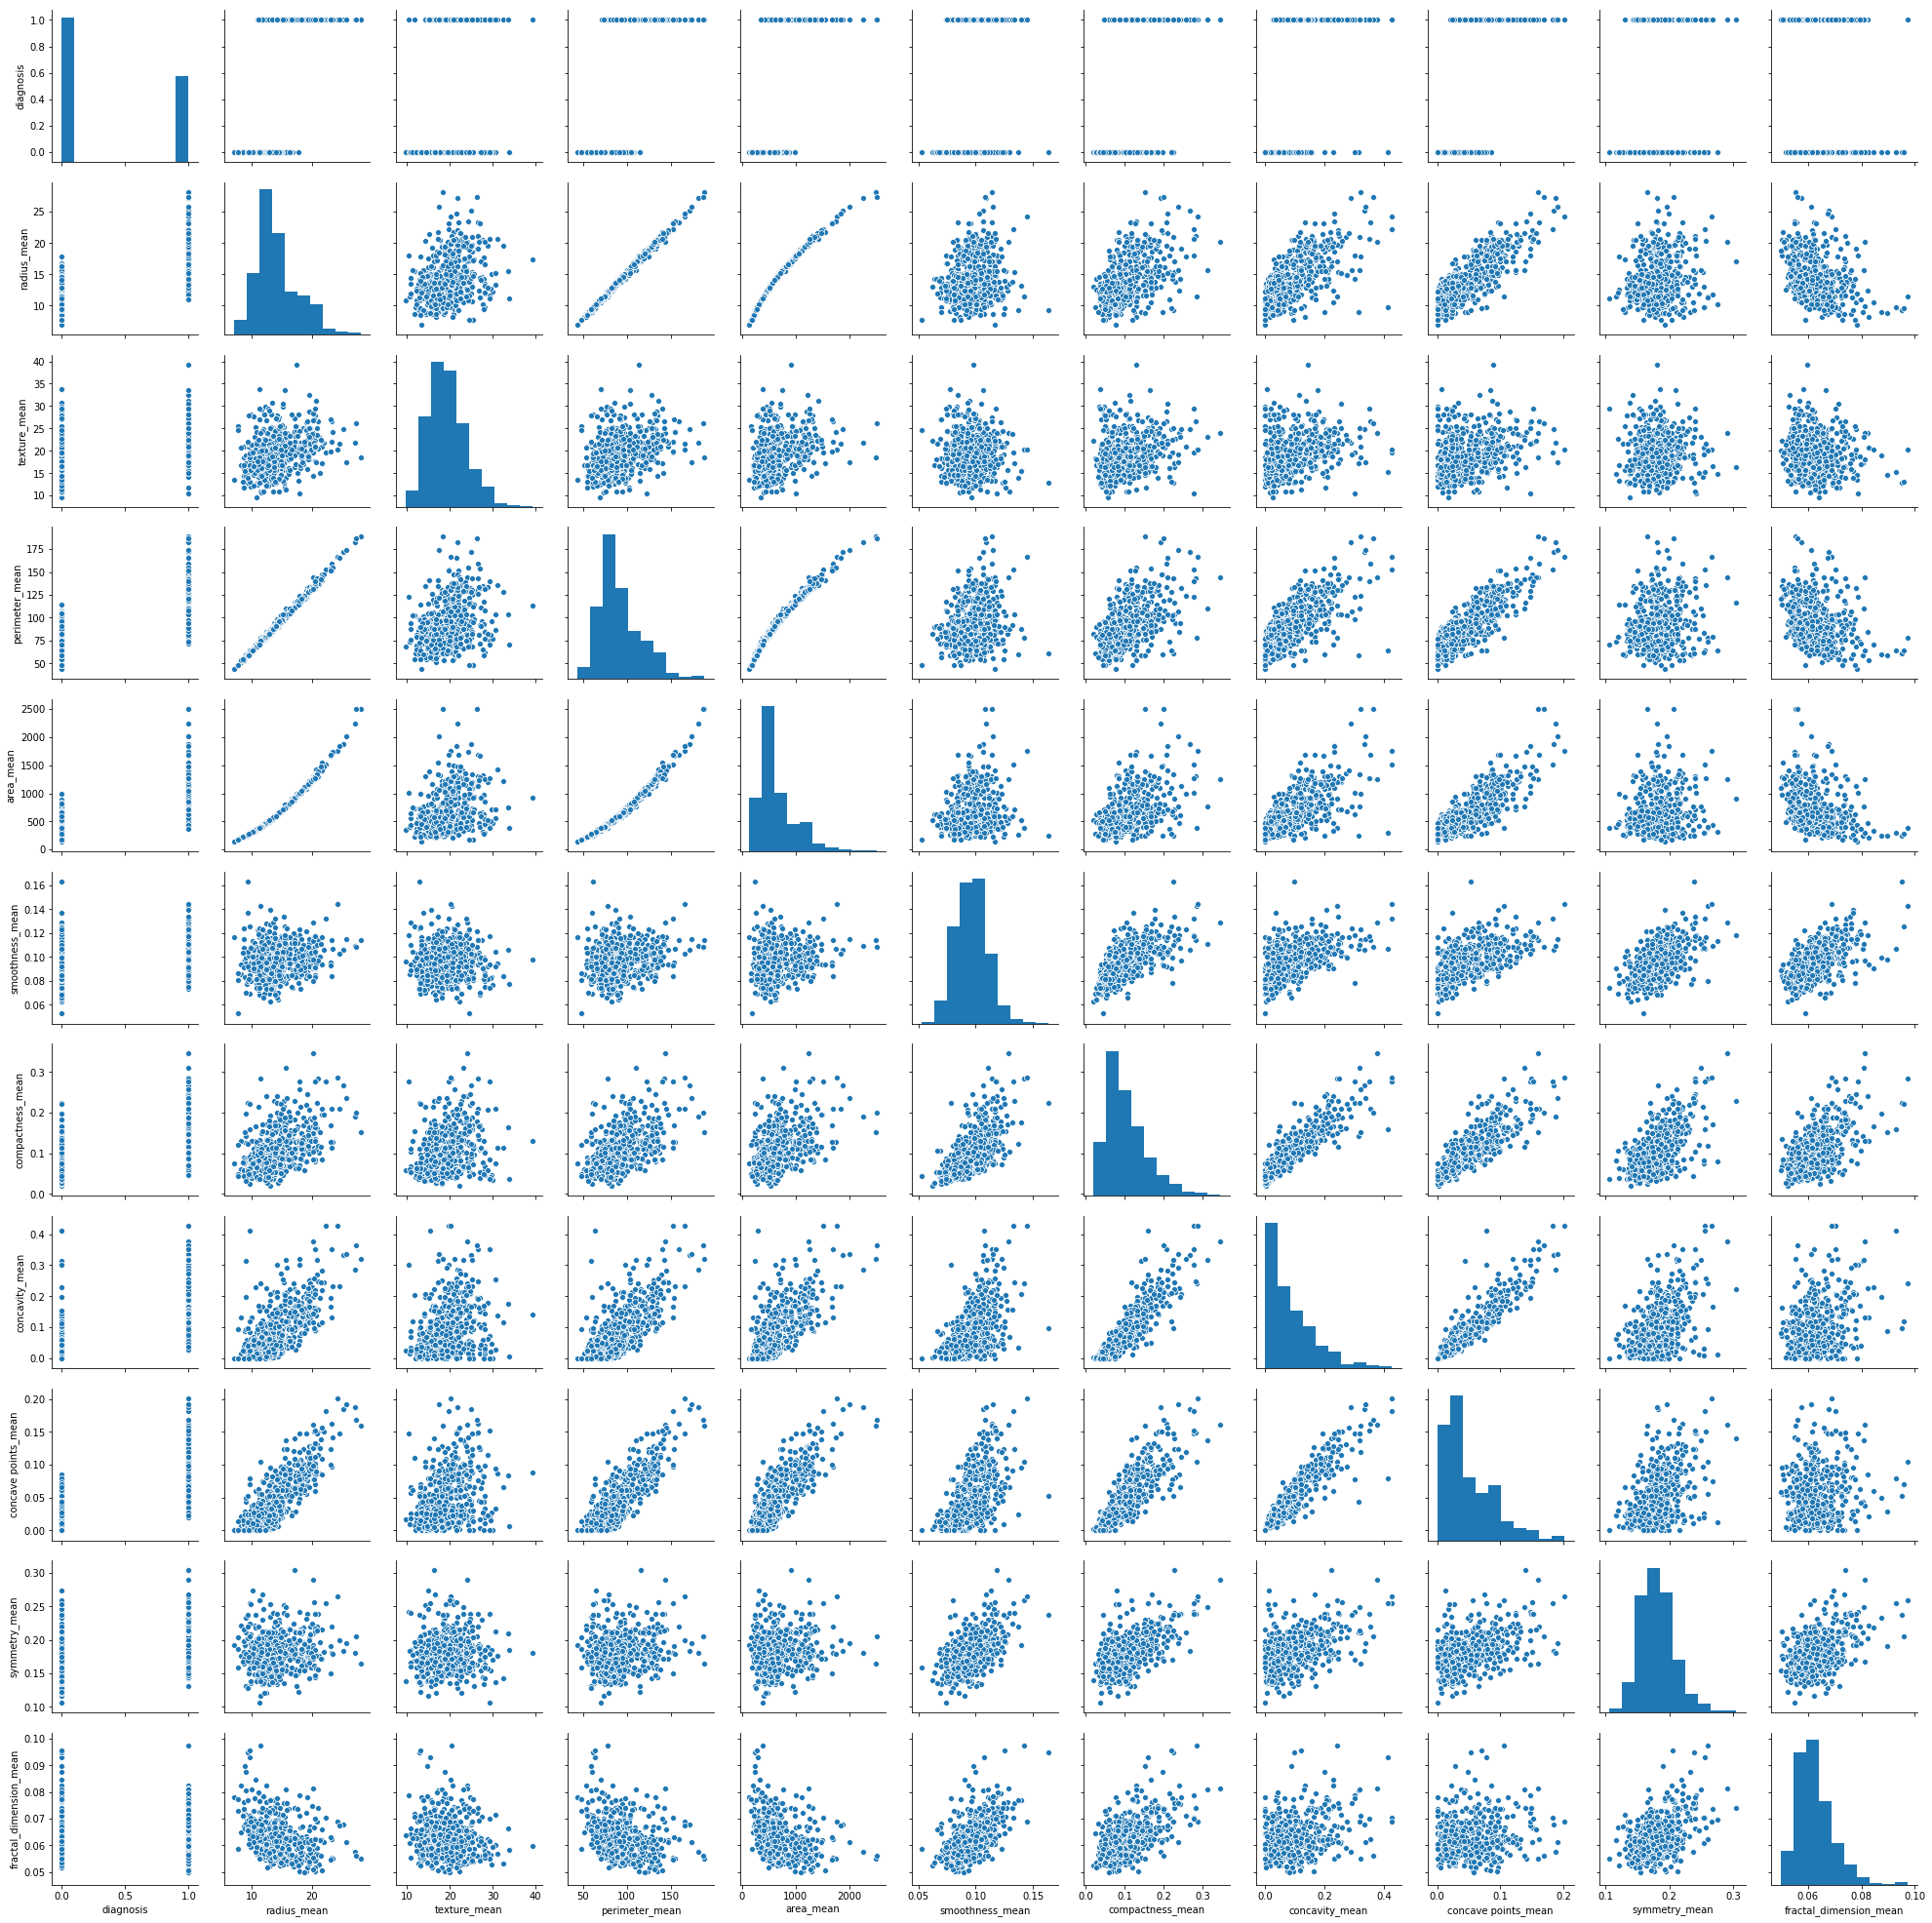

In [16]:
sns.pairplot(data_mean)

0    357
1    212
Name: diagnosis, dtype: int64

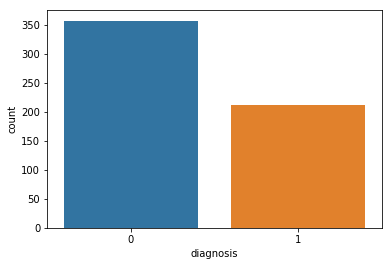

In [17]:
# посмотрим на соотношение доброкачественных ('Benign') и злокачественных ('Malignant') случаев
sns.countplot(x="diagnosis", data=data_mean)
data_mean.loc[:,'diagnosis'].value_counts()

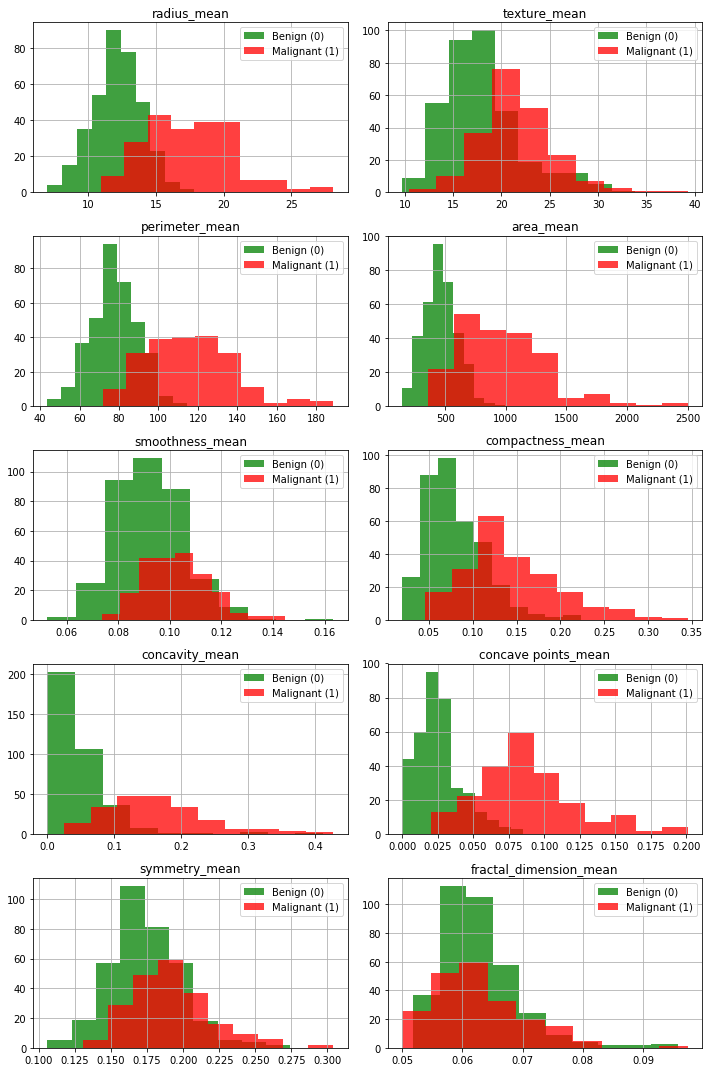

In [18]:
#посмотрим на распределение данных в зависимости от поставленного диагноза
#доброкачественные('Benign'- зеленый) и злокачественные ('Malignant' - красный) 

fig, ax  =  plt.subplots(5,2, figsize=(10,15))
for col,axis in zip(data_mean.columns[1:],[i for i in ax.flat]):
    data_mean.loc[data_mean['diagnosis']==0,data_mean.columns!='diagnosis'].hist \
    (column=col,ax=axis,alpha=0.75,color='green',label='Benign (0)')
    data_mean.loc[data_mean['diagnosis']==1,data_mean.columns!='diagnosis'].hist \
    (column=col,ax=axis,alpha=0.75,color='red',label='Malignant (1)') 
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

Из графиков видно, что злокачественные клетки в среднем имеют больший радиус, периметр и площадь. Они менее гладкие, имеют большее, по сравнению со здоровыми, количество точек вогнутости, и эти точки глубже.
Проверим эти гипотезы с помощью статистических методов.

6. С помощью статистических методов проверить взаимосвязи между переменными.

Используем T-tests

**а) Проверка гипотезы №1**

**Нулевая гипотеза:** средний радиус доброкачественных и злокачественных клеток одинаковый

**Альтернативная гипотеза:** средний радиус доброкачественных и злокачественных клеток разный

In [19]:
benign_diagnosis = data_mean[data_mean['diagnosis'] == 0]['radius_mean']
malignant_diagnosis = data_mean[data_mean['diagnosis'] == 1]['radius_mean']

stats.ttest_ind(benign_diagnosis, malignant_diagnosis)

Ttest_indResult(statistic=-25.435821610057054, pvalue=8.465940572262422e-96)

**Вывод:** Нулевую гипотезу отвергаем. Средний радиус доброкачественных и злокачественных клеток разный.

**б) Проверка гипотезы №2**

**Нулевая гипотеза:** доброкачественные клетки в среднем более гладкие, чем злокачественные

**Альтернативная гипотеза:** доброкачественные клетки в среднем менее гладкие, чем злокачественные

In [20]:
benign_diagnosis = data_mean[data_mean['diagnosis'] == 0]['smoothness_mean']
malignant_diagnosis = data_mean[data_mean['diagnosis'] == 1]['smoothness_mean']

stats.ttest_ind(benign_diagnosis, malignant_diagnosis)

Ttest_indResult(statistic=-9.146098808149038, pvalue=1.0518503592032013e-18)

**Вывод:** Нулевую гипотезу принимаем. Доброкачественные клетки в среднем более гладкие, чем злокачественные.

7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

Так как у нас нет категориальных признаков и в целом признаков немного, будем использовать стратегию сокращения размерности. Она даст лучший результат, чем генерация.

In [21]:
data_mean.shape

(569, 11)

In [22]:
#применим PCA (principal component analysis)
#но сначала сделаем нормализацию данных
a = [column for column in columns if 'mean' in column] # список колонок со словом 'mean'
data_normed = (data_mean - np.min(data_mean)) / (np.max(data_mean) - np.min(data_mean)).values
data_normed[a].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


Text(0, 0.5, 'explained_variance_ratio_')

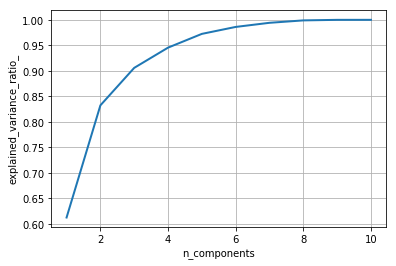

In [23]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_normed[a])

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

8. Рассчитать Feature Selection для выбранных переменных.

In [24]:
# 3 компоненты объясняют 90% дисперсии
pca = PCA(n_components=data_normed[a].shape[1]).fit(data_normed[a])
for i in range(1, data_normed[a].shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.613
n-components=2, explained variance 0.832
n-components=3, explained variance 0.906
n-components=4, explained variance 0.946
n-components=5, explained variance 0.972
n-components=6, explained variance 0.986
n-components=7, explained variance 0.994
n-components=8, explained variance 0.999
n-components=9, explained variance 1.000
n-components=10, explained variance 1.000


In [25]:
# найдем названия наиболее влиятельных компонент
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([61.25831297, 21.98248399,  7.3460217 ,  3.96486352,  2.69578783,
        1.3618532 ,  0.8090561 ,  0.4723663 ,  0.10615544,  0.00309894])

In [26]:
sorted(pca.components_[0], reverse=True)
print(np.argmax(pca.components_[0])) # номер компоненты, с влиянием 0.47
print(np.argmax(pca.components_[1])) # номер компоненты, с влиянием 0.43
print(np.argmax(pca.components_[2])) # номер компоненты, с влиянием 0.38


7
9
1


Таким образом, самые влиятельные:
1.concavity_mean (вогнутость)
2.symmetry_mean (симметрия)
3.radius_mean (радиус)

Наша гипотеза подтвердилась: вогнутость является лучшим показателем злокачественности клеток.

9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
#разделим данные на две выборки: train (80%) и test (20%)

x = data_mean.drop(['diagnosis'], axis=1, inplace=False)
y = data_mean.diagnosis

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [29]:
# проверим форму получившихся датафреймов
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (455, 10)
x_test : (114, 10)
y_train : (455,)
y_test : (114,)


In [30]:
# обучим XGB модель (градиентный бустинг)
model1 = XGBClassifier()
model1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [31]:
y_pred1 = model1.predict(x_test)
predictions1 = [value for value in y_pred1]
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 94.74%


In [32]:
def evaluate(model, predictions, test_labels):
    """Функция выводит значение F1 score"""
    from sklearn.metrics import f1_score
    F1 = np.mean(f1_score(test_labels, predictions))
    print('Model Performance')
    print('F1 score = %.3f' % F1)
    
    return f1_score

In [33]:
evaluate(model1, predictions1, y_test)

Model Performance
F1 score = 0.930


<function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [34]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [35]:
# обучим SVC модель (C-Support Vector Classification, метод опорных векторов)
model2 = SVC()
model2.fit(x_train,y_train)

C:\Users\Expert\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred2 = model2.predict(x_test)
predictions2 = [value for value in y_pred2]
accuracy2 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 94.74%


In [37]:
evaluate(model2, predictions2, y_test)

Model Performance
F1 score = 0.407


<function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>

In [38]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        71
           1       0.75      0.28      0.41        43

    accuracy                           0.69       114
   macro avg       0.72      0.61      0.60       114
weighted avg       0.71      0.69      0.65       114

